<a href="https://colab.research.google.com/github/Fu-kit/resubmission-assessment1-CSC101/blob/main/resubmission_assessment1_csc101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please paste your text:
I can't believe it.

--- Results ---
Total words: 4
Average word length: 3.75

Top 10 words:
   word  count
      i      1
  can't      1
believe      1
     it      1


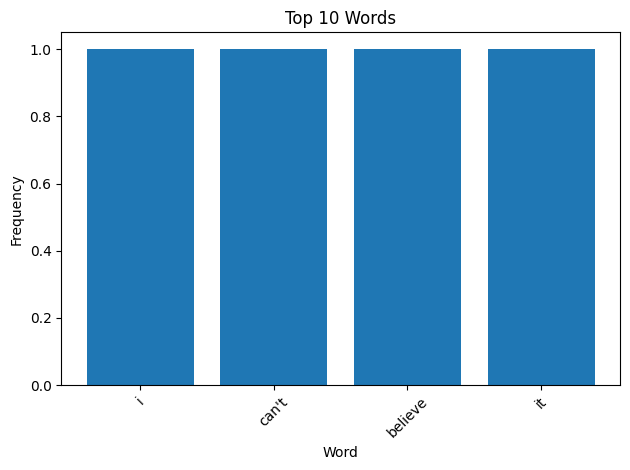

In [12]:
!pip install -q pyinputplus pandas matplotlib

# =========================================
# Text Analysis Tool — One-shot (no menu)
# - User pastes text once
# - Tokenize -> analyze -> print stats -> show bar chart (non-saving)
# - Uses pyinputplus, pandas, matplotlib
# - Pythonic tokenizer keeps apostrophes ("can't", "it’s")
# =========================================

import pyinputplus as pyip
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Step 1: Input ----------
def get_user_text():
    """Prompt user for text (pyinputplus)."""
    return pyip.inputStr("Please paste your text:\n")

# ---------- Step 2: Tokenize (Pythonic, keeps ' and ’) ----------
def tokenize_text(text):
    """
    Lowercase; keep letters/digits/spaces/apostrophes; replace others with spaces; split to words.
    Preserves both straight (') and curly (’).
    """
    text = text.lower()
    keep_apostrophes = {"'", "’"}
    allowed = lambda ch: ch.isalnum() or ch.isspace() or ch in keep_apostrophes
    cleaned_text = "".join(ch if allowed(ch) else " " for ch in text)
    return cleaned_text.split()

# ---------- Step 3: Analysis (pandas) ----------
def analyze(words):
    """Return total_words (int), avg_word_len (float), and a Series of counts (desc)."""
    total_words = len(words)
    avg_word_len = (sum(len(w) for w in words) / total_words) if total_words else 0.0
    counts = pd.Series(words, dtype="string").value_counts() if words else pd.Series(dtype=int)
    return total_words, avg_word_len, counts

def make_top_table(counts, n=10):
    """Neat top-N table as DataFrame with columns: word, count."""
    if counts is None or counts.empty:
        return pd.DataFrame(columns=["word", "count"])
    return (counts.head(n)
            .reset_index()
            .rename(columns={"index": "word", 0: "count"}))

# ---------- Step 4: Plot (non-saving) ----------
def plot_top_words(counts, n=10):
    """Show a bar chart for top-N words (non-saving)."""
    if counts is None or counts.empty:
        print("No words to plot.")
        return
    data = counts.head(n)
    plt.figure()
    plt.bar(data.index, data.values)
    plt.title(f"Top {n} Words")
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------- Main: one-shot pipeline ----------
def main():
    text = get_user_text()
    words = tokenize_text(text)

    total, avg_len, counts = analyze(words)
    top10 = make_top_table(counts, n=10)

    print("\n--- Results ---")
    print(f"Total words: {total}")
    print(f"Average word length: {avg_len:.2f}")

    print("\nTop 10 words:")
    if top10.empty:
        print("(no words)")
    else:
        print(top10.to_string(index=False))

    # Show non-saving chart
    plot_top_words(counts, n=10)

if __name__ == "__main__":
    main()
